Q1:What is our independent variable? What is our dependent variable?

A1:independent variable is Congruent and incongruent;
dependent variable is Time.

Q2:What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform?

A2:Hypothese null: mean of congruent's time is equal mean of incongruent's time;
   Alternative hypothese: mean of congruent's time is not equal mean of incongruent's time.
   H0:μC-μI=0
   Ha:μC-μI≠0
   
   H0=Hypothese null
   Ha=Alternative hypothese
   μC=congruent's population mean
   μI=incongruent's population mean
   
   Since we dont know the population mean and standard deviation and sample less than 30, we can choose to do T test. The sample are dependent. We assume that the distributions are Gaussian, so I expect to perform the Paried T test.
 
   

Q3: Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [1]:
import csv
import numpy as np
import pandas as pd
filename='C:\Users\Administrator\udacity\data analyst\P01\stroopdata.csv'

stroop_df = pd.read_csv(filename)

def datainfo(index):

    print index + '\'min' , stroop_df[index].min()
    print index + '\'s median: ', "%.2f" %stroop_df[index].median()   
    print index + '\'max' , stroop_df[index].max() 
    print index + '\'s mean: ', "%.2f" %stroop_df[index].mean()
    print index + '\'standard deviation: ', "%.2f" %stroop_df[index].std() , '\n'

    return None

In [2]:
datainfo('Congruent')
datainfo('Incongruent')

Congruent'min 8.63
Congruent's median:  14.36
Congruent'max 22.328
Congruent's mean:  14.05
Congruent'standard deviation:  3.56 

Incongruent'min 15.687
Incongruent's median:  21.02
Incongruent'max 35.255
Incongruent's mean:  22.02
Incongruent'standard deviation:  4.80 



Q4:  provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

A4: Based on the hist and dot plot for both Congruent and Incongruent data, we can observe different bar plot is based from percentage from the data and the number of bins actually affect the shape of the hist compared to the dot plot.  If we don't have a clear guide of segmentation of the bins, we may want to use dot plot for more detail view. From the dot plot we can tell the overall time for Congruent is around 10-22seconds, and the time for Incongruent is between 15~27seconds. The maximum # of time for Congruent is 10seconds. The maximum # of time for Incongruent is 15seconds. At the end we use boxplot to see a bigger picture of the data. we can see both of the data do not have outlier. we can see the middle 50%(Q1~Q3) Congruent's data is between 12~16second and median is 14. and middle 50%(Q1~Q3) Incongruent's data is between 18~24 and median is 21. The boxplot shows majority of Congruent time is lower than Incongruent's time.

Populating the interactive namespace from numpy and matplotlib



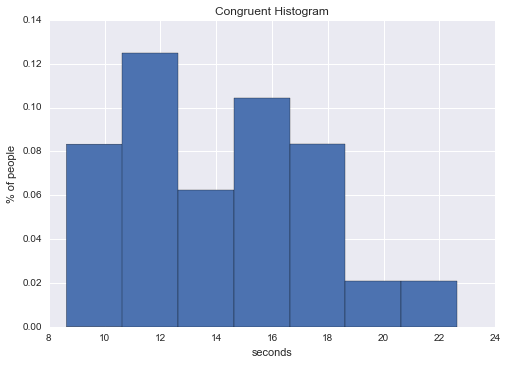

In [3]:
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
plt.hist(stroop_df['Congruent'],bins=np.arange(min(stroop_df['Congruent']), max(stroop_df['Congruent'])+2,2),normed=True)

plt.title("Congruent Histogram")

plt.xlabel('seconds')
plt.ylabel("% of people")

print ""

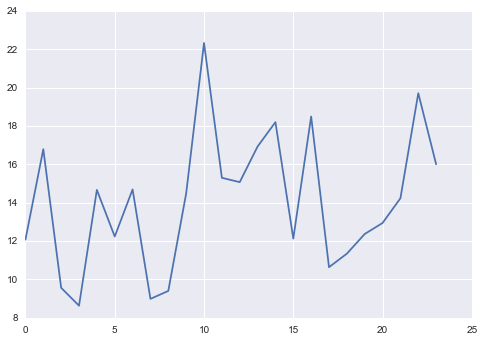

In [4]:
plt.plot(stroop_df['Congruent'])

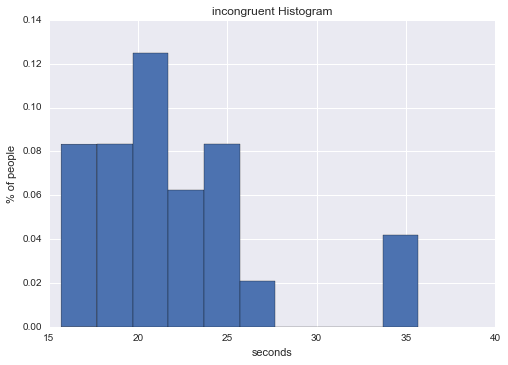

In [5]:
plt.hist(stroop_df['Incongruent'],bins=np.arange(min(stroop_df['Incongruent']), max(stroop_df['Incongruent'])+2,2),normed=True)

plt.title("incongruent Histogram")

plt.xlabel('seconds')
plt.ylabel("% of people")

print ""

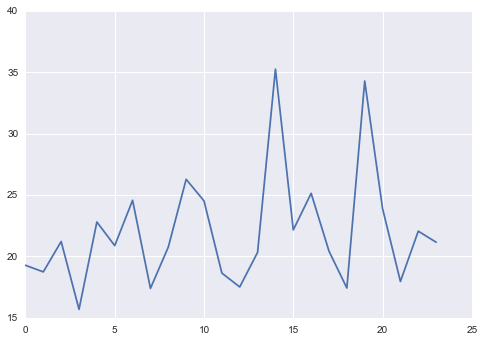

In [6]:
plt.plot(stroop_df['Incongruent'])

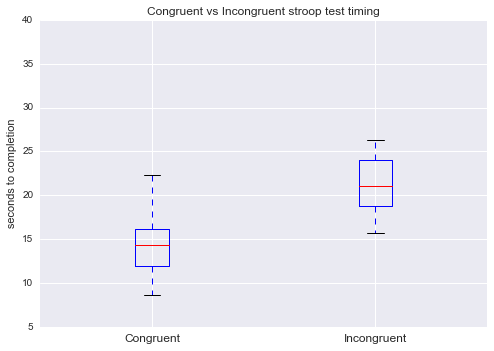

In [7]:
stroop_df.boxplot(return_type='axes')
plt.title("Congruent vs Incongruent stroop test timing")
plt.ylabel("seconds to completion")

Q5: Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [8]:
def find_sd_T_Test(data):
    diff= data[data.columns[0]]-data[data.columns[1]]
    diffsq=(diff-diff.mean())**2
    sdsqrt=diffsq.sum()/(len(diffsq)-1)
    
    sd=sdsqrt**(0.5)
    
    return sd
    
def find_t(data, sd):
    diff= data[data.columns[0]]-data[data.columns[1]]
    return diff.mean()/(sd/len(diff)**(0.5))

def t_table(C_level,data):
    from scipy import stats
    print "confidence level: ",C_level
    return stats.t.ppf((1-C_level)/2,len(data)-1)

def reject(t_cala,t_citi):
    print 'T values calculate: ' , t_cala
    print 'T values from table: ', t_citi
    
    if abs(t_cala)>abs(t_citi):
        return "reject H0"
    elif abs(t_cala)<abs(t_citi):
        return "fail to reject H0"


In [9]:
reject(find_t(stroop_df,find_sd_T_Test(stroop_df)),t_table(.95,stroop_df))

confidence level:  0.95
T values calculate:  -8.02070694411
T values from table:  -2.06865761042


'reject H0'

A5: I use 95% as confidence level and the t critical from table is -2.069, since i am performing two tail testing; the T value calculated is -8.02. Therefore, i reject the null hypothesis. which means the Congruent and Incongruent have a significant different. it match my expectation.

Q6: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

A6: I think because the color and word is different, it cause people take longer time for answer the question. we also can test for number instead of color.